In [4]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
import matplotlib as mpl

warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2


In [5]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D')
fig_dir = os.path.join(output_dir, 'figures')
lr = 0.0005
max_epoch = 30000
dset='nsdsyn'
roi_list = ['V1','V2','V3']
vsc='pRFsize'
nsd_subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]
ARGS_2D = ['sub','lr','eph','roi','dset']
roi_pal = [sns.color_palette('dark', 10)[:][k] for k in  [3,2,0]]
roi_pal.insert(0, (0.3,0.3,0.3))
stim_classes=['annulus', 'reverse spiral', 'pinwheel', 'forward spiral']

In [6]:
pt_file_list = []
dset = 'nsdsyn'
for subj, roi in itertools.product(nsd_subj_list, ['V1', 'V2', 'V3']):
    file_name = os.path.join(output_dir, 'sfp_model', 'results_2D', dset,
                             f'model-params_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(file_name)
nsd_params = model.load_all_models(pt_file_list, *ARGS_2D)

nsd_precision_s = pd.read_csv(
    os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-s_dset-{dset}_vs-pRFsize.csv'))
nsd_df = pd.merge(nsd_params, nsd_precision_s[['sub', 'vroinames', 'precision']], on=['sub', 'vroinames'])


# Individual parameter values along visual hierarchy

<AxesSubplot:xlabel='vroinames', ylabel='sigma'>

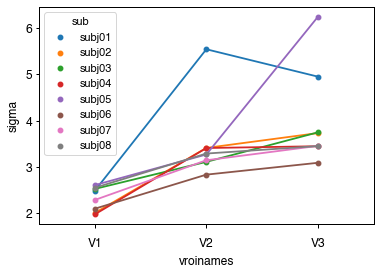

In [12]:
sns.pointplot(data=nsd_df, x='vroinames', y='sigma', hue='sub')


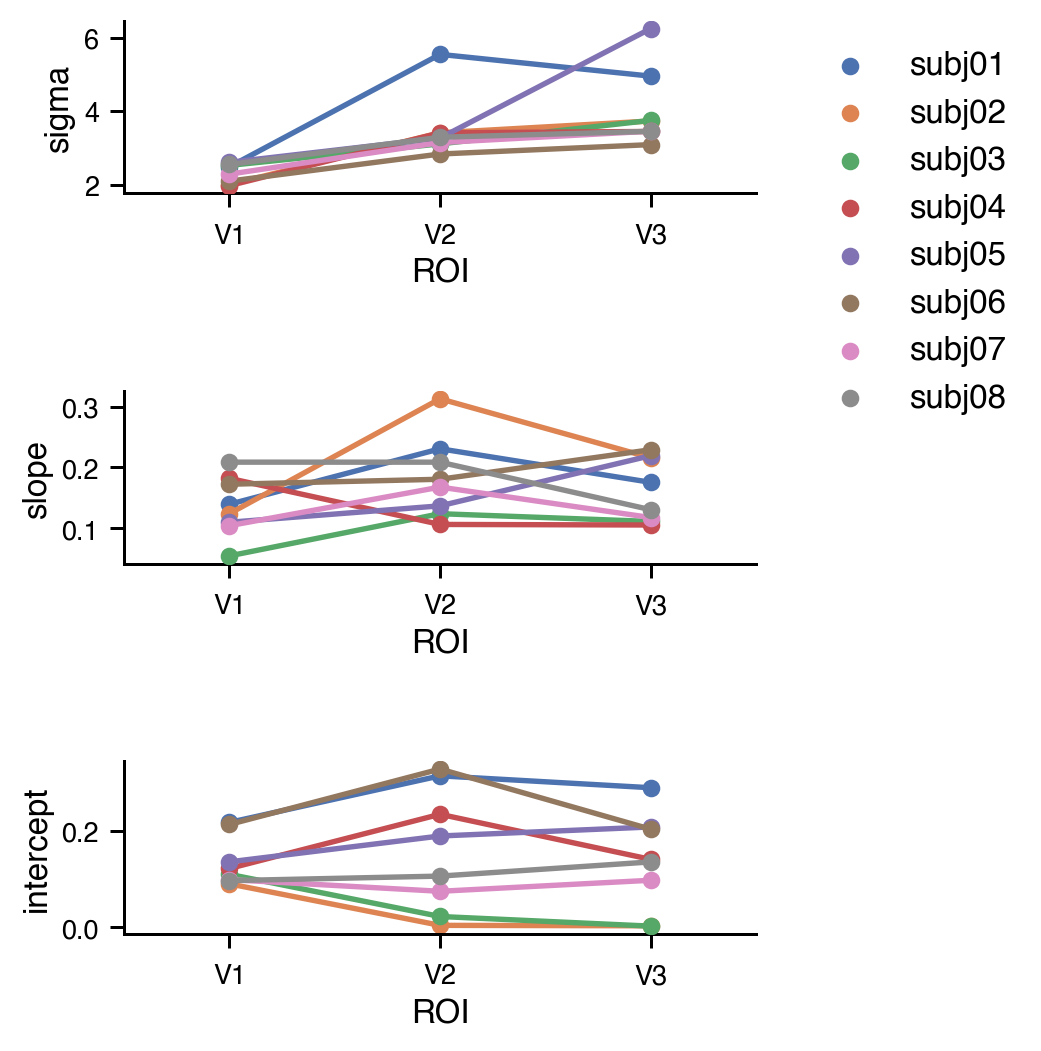

In [19]:
import matplotlib.pyplot as plt
from sfp_nsdsyn import vis2D

fig, axes = plt.subplots(3, 1, figsize=(5,5),
                             sharey=False, sharex=False)

g = vis2D.plot_parameter_across_rois(nsd_df, 'sigma', 'sub', ax=axes[0])
vis2D.plot_parameter_across_rois(nsd_df, 'slope', 'sub', ax=axes[1])
vis2D.plot_parameter_across_rois(nsd_df, 'intercept', 'sub', ax=axes[2])
g.legend(bbox_to_anchor=(1.05, 1), loc='best', frameon=False)

plt.tight_layout()
